In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_row', 150)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import seaborn as sns
import matplotlib.pyplot as plt

from risk_measure import LabelSetting, Core
from Label_combine import data_merged
import pyfolio as pf
%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()


/opt/conda/envs/bigcon/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


### Portfolio performance

In [2]:
measure_1 = pd.read_csv("./measrue/measure.csv")
measure_2 = pd.read_csv("./measrue/measure_2.csv")
measure_3 = pd.read_csv("./measrue/measure_coin.csv")



In [3]:
measure_1

,ID,index,Strategy,Benchmark,target_ratio,win,model
0,YM_4h,Cumulative Return,0.0581,0.0581,Target_2.0_Label,True,xg
1,YM_4h,CAGR﹪,0.0491,0.0491,Target_2.0_Label,True,xg
2,YM_4h,Volatility (ann.),-0.0790,-0.0790,Target_2.0_Label,True,xg
3,YM_4h,Sharpe,0.1658,0.1658,Target_2.0_Label,True,xg
4,YM_4h,Max Drawdown,-0.1462,-0.1462,Target_2.0_Label,True,xg
...,...,...,...,...,...,...,...
9317,PL_8h,Volatility (ann.),-0.1045,-0.0861,Target_4.0_Label,False,et
9318,PL_8h,Sharpe,1.0175,0.6067,Target_4.0_Label,True,et
9319,PL_8h,Max Drawdown,-0.0773,-0.0731,Target_4.0_Label,False,et
9320,PL_8h,Daily Value-at-Risk,-0.0104,-0.0087,Target_4.0_Label,False,et


In [4]:
measure_1 = measure_1[measure_1["index"] != "None"]
measure_2 = measure_2[measure_2["index"] != "None"]
measure_3 = measure_3[measure_3["index"] != "None"]

maesure = pd.concat([measure_1, measure_2, measure_3]).reset_index(drop = True)
maesure = maesure[maesure["ID"].str.endswith("4h")].reset_index(drop = True).copy()
maesure['ID'] = maesure['ID'].str.replace("_4h", '')

maesure["win"] = maesure["win"].replace("0", 0)
maesure["win"] = maesure["win"].replace("False", 0)
maesure["win"] = maesure["win"].replace("True", 1)

maesure = maesure[(maesure["ID"] != "BZ") & (maesure["ID"] != "MME") & (maesure["ID"] != "PL") &(maesure["ID"] != "NKD")].reset_index(drop = True)

maesure = maesure[maesure["model"] != "svm"].reset_index(drop = True)
maesure = maesure[maesure["model"] != "et"].reset_index(drop = True)

In [5]:
maesure = maesure[(maesure["ID"] != "MGC") & (maesure["ID"] != "NIY") & (maesure["ID"] != "GC")]

In [6]:
maesure["ID"].unique()

array(['YM', 'NQ', 'ES', 'PA', 'EW', 'RTY', 'UB', 'CL', 'VX', 'BTC',
       'ETH', 'DOGE', 'SOL', 'BNB', 'ADA', 'XRP'], dtype=object)

In [7]:
def return_table(table):
    t = pd.pivot_table(table.groupby(["index","target_ratio"]).sum()[["win"]].reset_index(), values='win', index=['index'], columns='target_ratio')

    t = t.reindex(index=["Cumulative Return","CAGR﹪", "Volatility (ann.)","Sharpe" ,"Daily Value-at-Risk","Expected Shortfall (cVaR)","Max Drawdown"])
    t.columns = ["0.50", "0.55", "0.60", "0.65", "0.70", "0.75", "0.80", "0.85", "0.90", "0.95", "1.00"] 
    t.rename(index={"Cumulative Return":"Return",
                        "CAGR﹪":"CAGR",
                        "Volatility (ann.)":"Volatility",
                        "Sharpe" : "Sharpe ratio",
                        "Daily Value-at-Risk" : "VaR 95%",
                        "Expected Shortfall (cVaR)" : "CVaR 95%",
                        "Max Drawdown" : "MDD"
                       },inplace=True)
    return t

In [8]:
result_YM = return_table(maesure[maesure["ID"] == "YM"])
result_NQ = return_table(maesure[maesure["ID"] == "NQ"])
result_ES = return_table(maesure[maesure["ID"] == "ES"])
result_PA = return_table(maesure[maesure["ID"] == "PA"])
result_EW = return_table(maesure[maesure["ID"] == "EW"])
result_UB = return_table(maesure[maesure["ID"] == "UB"])
result_CL = return_table(maesure[maesure["ID"] == "CL"])
result_VX = return_table(maesure[maesure["ID"] == "VX"])
result_RTY = return_table(maesure[maesure["ID"] == "RTY"])

result_BTC = return_table(maesure[maesure["ID"] == "BTC"])
result_ETH = return_table(maesure[maesure["ID"] == "ETH"])
result_DOGE = return_table(maesure[maesure["ID"] == "DOGE"])
result_SOL = return_table(maesure[maesure["ID"] == "SOL"])
result_BNB = return_table(maesure[maesure["ID"] == "BNB"])
result_ADA = return_table(maesure[maesure["ID"] == "ADA"])
result_XRP = return_table(maesure[maesure["ID"] == "XRP"])

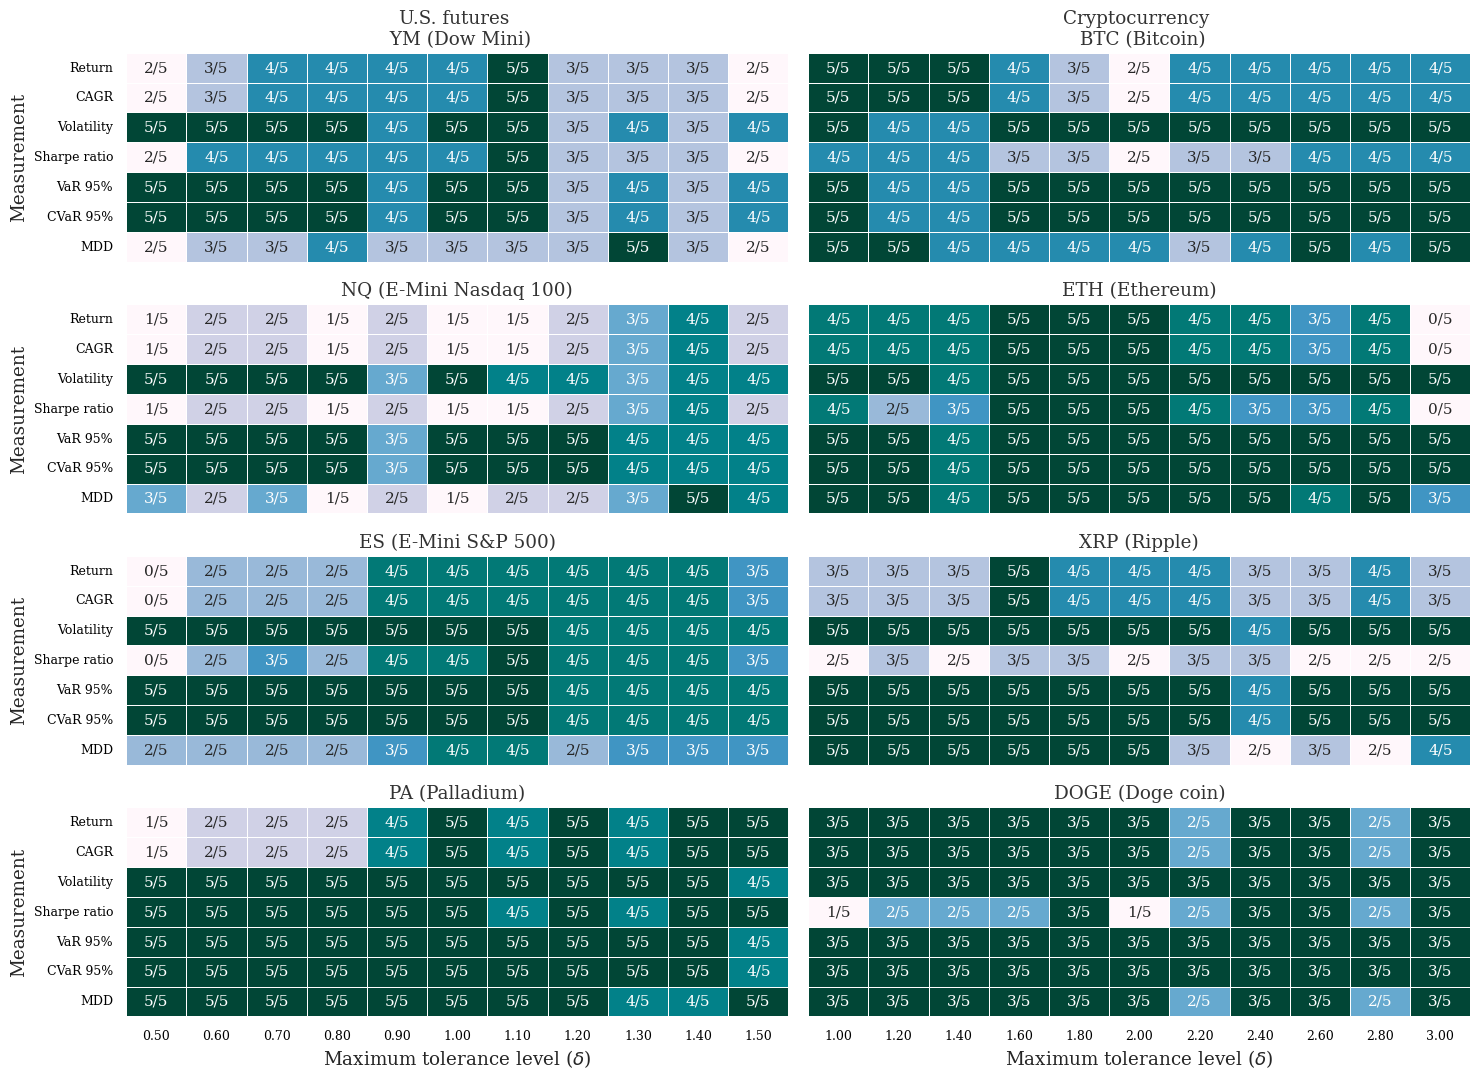

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


#plt.rcParams['font.family'] = 'Times'
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'} , rc={"xtick.labelcolor": "black", "ytick.labelcolor": "black"})
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 9}

fig, axs = plt.subplots(ncols=2, nrows = 4, figsize=(15, 11))


g = sns.heatmap(result_YM, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[0,0],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("U.S. futures \n YM (Dow Mini)")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.tick_params(axis="y", labelsize=9, colors="black")
g.tick_params(axis="x", labelsize=9, colors="black")
g.set_xticklabels([])
g.set_ylabel(None)
g.set_ylabel(None)
g.set(ylabel="Measurement")

g = sns.heatmap(result_NQ, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[1,0],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("NQ (E-Mini Nasdaq 100)")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.tick_params(axis="y", labelsize=9, colors="black")
g.tick_params(axis="x", labelsize=9, colors="black")
g.set_xticklabels([])
g.set_ylabel(None)
g.set_ylabel(None)
g.set(ylabel="Measurement")


g = sns.heatmap(result_ES, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[2,0],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("ES (E-Mini S&P 500)")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.tick_params(axis="y", labelsize=9, colors="black")
g.tick_params(axis="x", labelsize=9, colors="black")
g.set_xticklabels([])
g.set_ylabel(None)
g.set_ylabel(None)
g.set(ylabel="Measurement")

g = sns.heatmap(result_PA, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[3,0],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("PA (Palladium)")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.tick_params(axis="y", labelsize=9, colors="black")
g.tick_params(axis="x", labelsize=9, colors="black")
g.set_xticklabels(['0.50','0.60', '0.70', '0.80', '0.90', '1.00', '1.10', '1.20', '1.30', '1.40', '1.50'], rotation = 0, fontname="DejaVu Serif")
g.set_ylabel(None)
g.set_ylabel(None)
g.set(ylabel="Measurement")
g.set(xlabel="Maximum tolerance level ($\delta$)")
##################################################################################################################################

g = sns.heatmap(result_BTC, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[0,1],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("Cryptocurrency \n BTC (Bitcoin)")
g.set_yticklabels([])
g.set_ylabel(None)
g.set_xticklabels([])

g = sns.heatmap(result_ETH, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[1,1],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("ETH (Ethereum)")
g.set_yticklabels([])
g.set_ylabel(None)
g.set_xticklabels([])


g = sns.heatmap(result_XRP, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[2,1],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("XRP (Ripple)")
g.set_yticklabels([])
g.set_ylabel(None)
g.set_xticklabels([])

g = sns.heatmap(result_DOGE, cmap='PuBuGn',annot=True, cbar = False, linewidths=.5,  ax = axs[3, 1],annot_kws={"size": 11}) # non _noised
for text in g.texts:
    text.set_text(text.get_text() + "/5")
g.set_title("DOGE (Doge coin)")
g.set_xticklabels(['1.00','1.20', '1.40', '1.60', '1.80', '2.00', '2.20', '2.40', '2.60', '2.80', '3.00'], rotation = 0)
g.set_yticklabels([])
g.tick_params(axis="x", labelsize=9, colors="black")
g.set_ylabel(None)
g.set(xlabel="Maximum tolerance level ($\delta$)")

#####################################################################################################################################
plt.tight_layout()
plt.savefig("measure.pdf")
plt.savefig("measure.png")

#g.set_title("Similarity loss functions", fontsize  = 15)